In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [17]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
df.drop(columns = ['car_ID', 'symboling'  ], inplace = True)
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CarName,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205.0,NaN,NaN,NaN,98.76,6.02,86.6,94.5,97.0,102.4,120.9
carlength,205.0,NaN,NaN,NaN,174.05,12.34,141.1,166.3,173.2,183.1,208.1
carwidth,205.0,NaN,NaN,NaN,65.91,2.15,60.3,64.1,65.5,66.9,72.3


In [20]:
df["doornumber"] = df["doornumber"].replace({"four":4, "two":2}).astype("int64")


df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}).astype('int64')

/tmp/ipykernel_30/3513247667.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["doornumber"] = df["doornumber"].replace({"four":4, "two":2}).astype("int64")
/tmp/ipykernel_30/3513247667.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}).astype('int64')


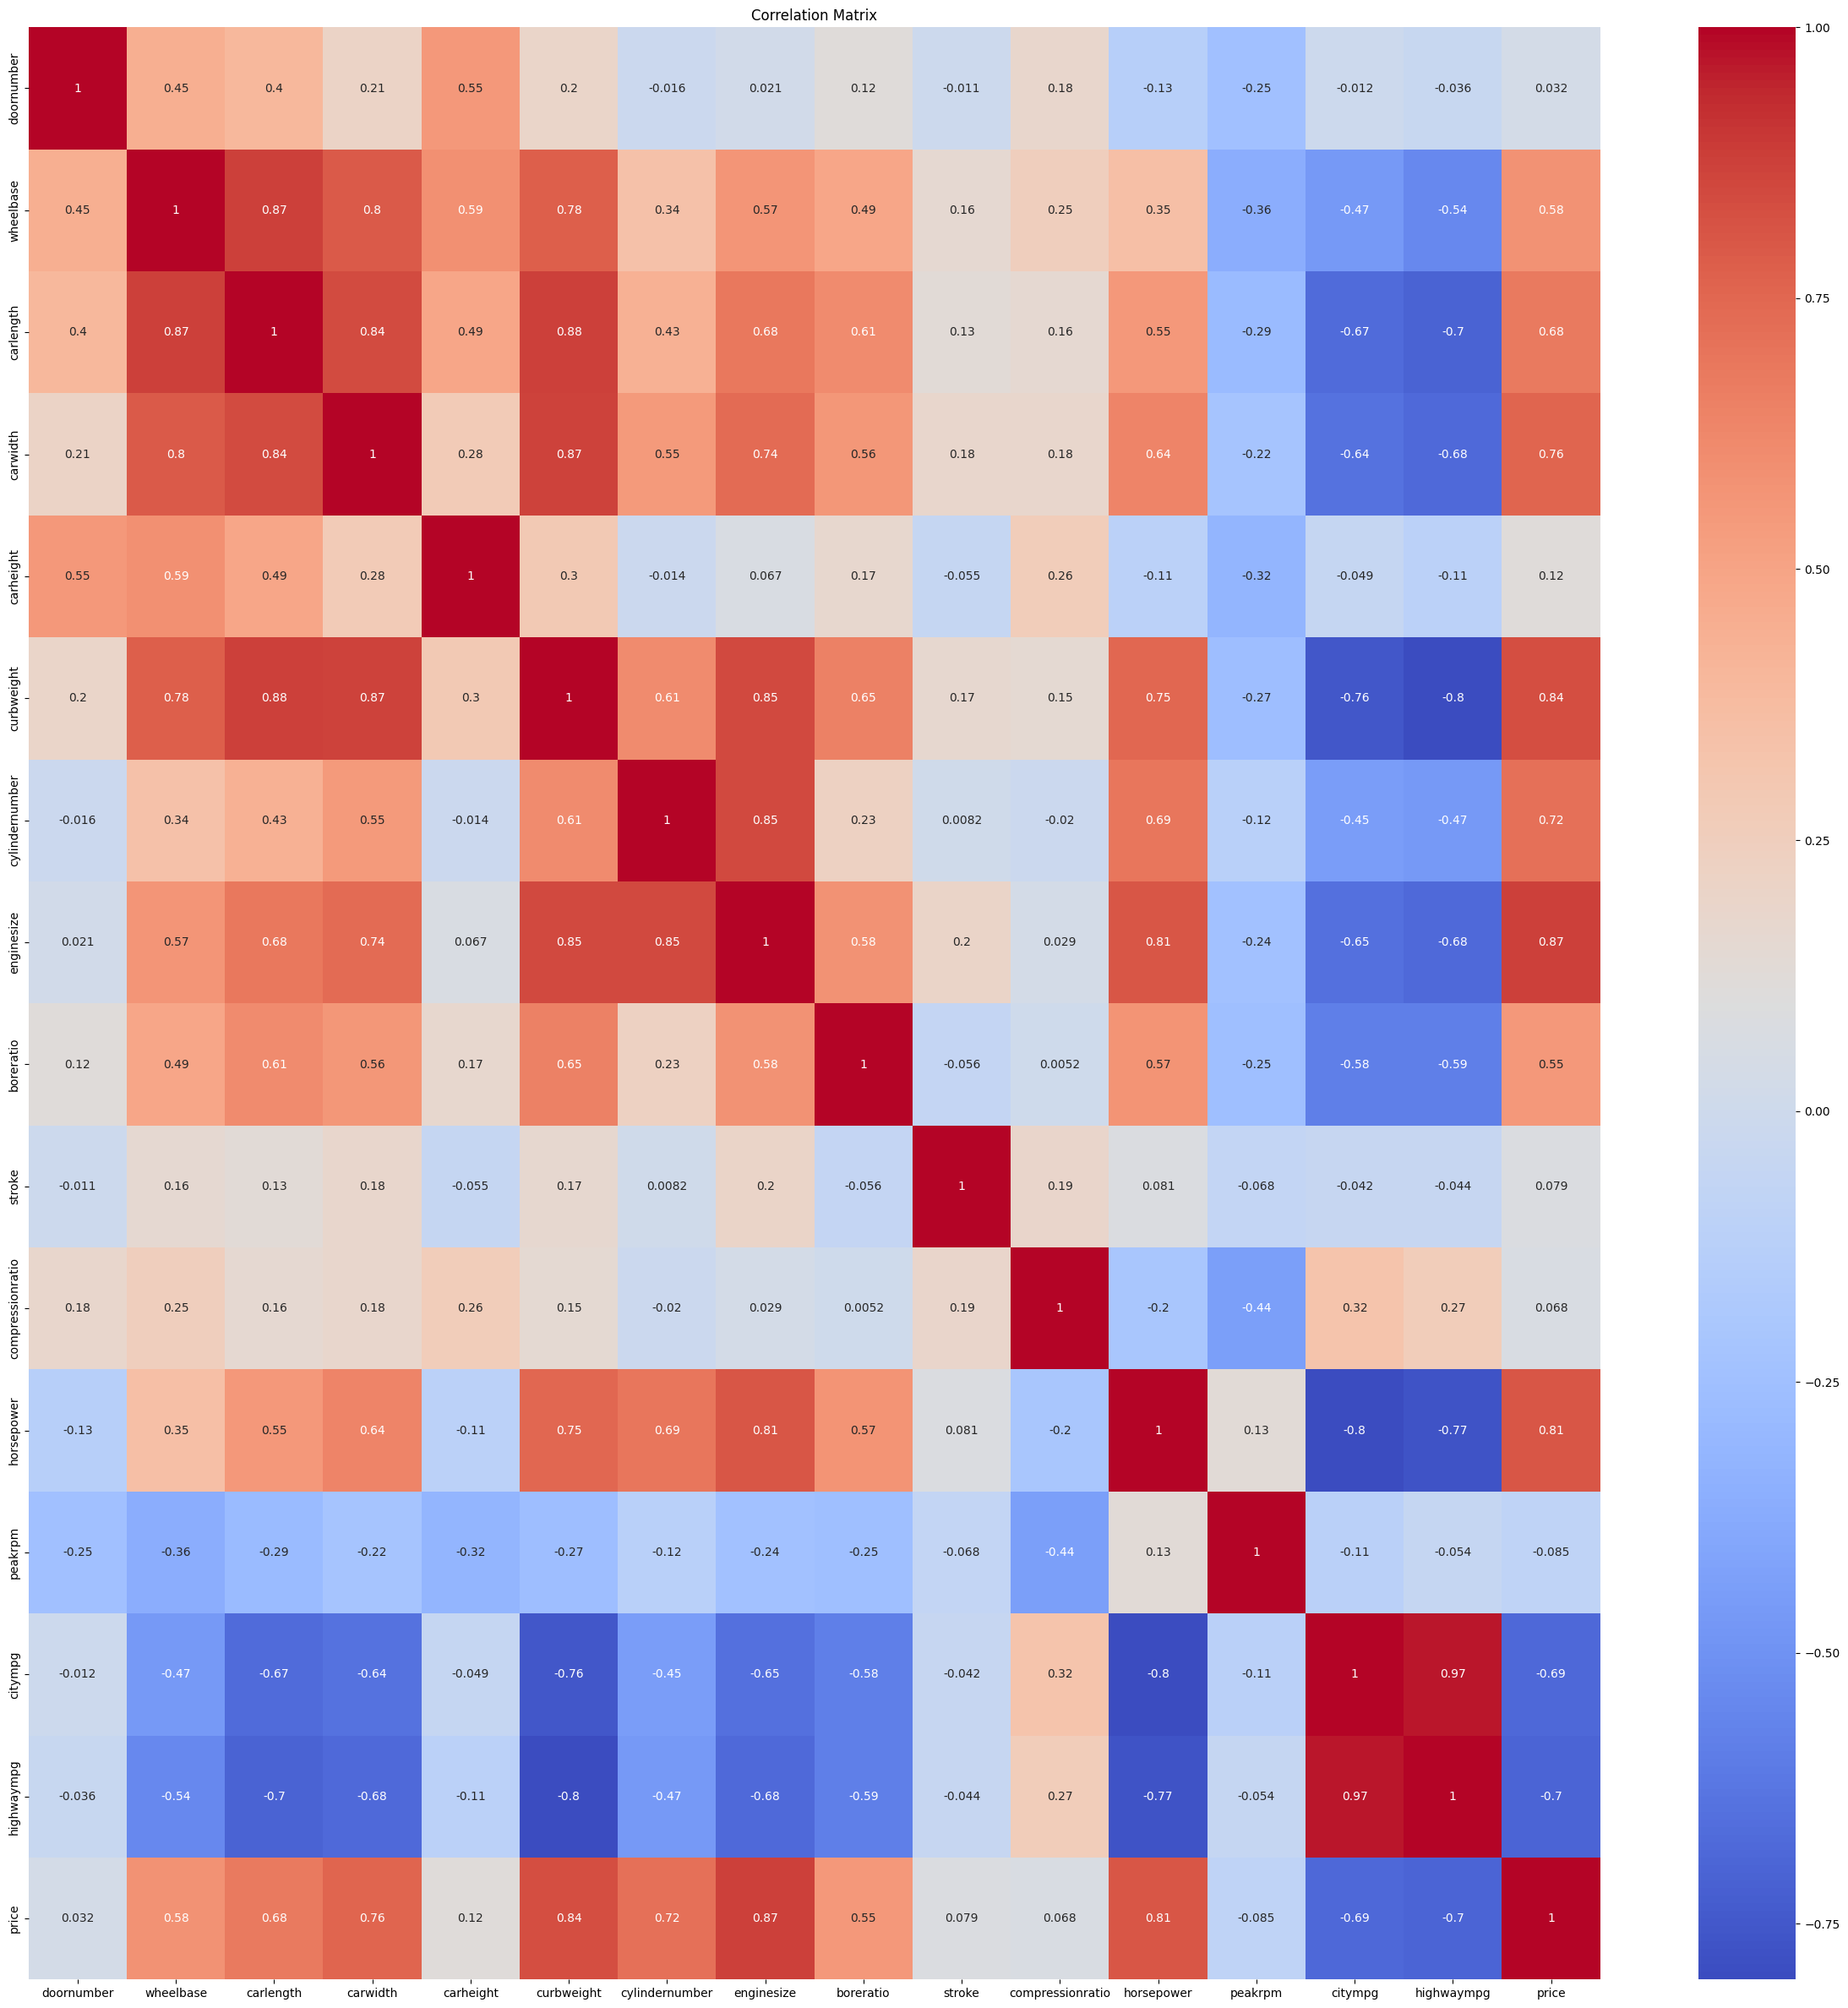

doornumber          0.031835
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


In [21]:
import seaborn as sns
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix["price"])

In [22]:
final_columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'horsepower', 'boreratio', 'price']
car_df = df[final_columns]
car_df.head()

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,horsepower,boreratio,price
0,88.6,168.8,64.1,2548,4,130,111,3.47,13495.0
1,88.6,168.8,64.1,2548,4,130,111,3.47,16500.0
2,94.5,171.2,65.5,2823,6,152,154,2.68,16500.0
3,99.8,176.6,66.2,2337,4,109,102,3.19,13950.0
4,99.4,176.6,66.4,2824,5,136,115,3.19,17450.0


In [23]:
def error_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):
    
    errors = {}
      
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMSE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)
    
    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMSE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)
    
    return errors

model_evaluation = []

In [24]:
z = round(df.groupby(["CarName"])["price"].agg(["mean"]),2).T
z

CarName,Nissan versa,alfa-romero Quadrifoglio,alfa-romero giulia,alfa-romero stelvio,audi 100 ls,audi 100ls,audi 4000,audi 5000,audi 5000s (diesel),audi fox,...,volkswagen type 3,volvo 144ea,volvo 145e (sw),volvo 244dl,volvo 245,volvo 246,volvo 264gl,volvo diesel,vw dasher,vw rabbit
mean,5499.0,16500.0,13495.0,16500.0,13950.0,17580.0,23875.0,18920.0,17859.17,15250.0,...,8195.0,16230.0,14892.5,18735.0,16515.0,22470.0,20522.5,18950.0,11595.0,9980.0


In [25]:
df = df.merge(z.T,how="left", on ="CarName")
df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean
0,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,13495.0
1,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,16500.0
2,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,16500.0
3,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,13950.0
4,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,14892.5
201,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,16230.0
202,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,18735.0
203,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,22470.0


In [26]:


new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price']]
new_df.head()



,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,2,convertible,rwd,dohc,4,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,gas,std,2,convertible,rwd,dohc,4,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,gas,std,2,hatchback,rwd,ohcv,6,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,gas,std,4,sedan,fwd,ohc,4,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,gas,std,4,sedan,4wd,ohc,5,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


In [27]:
X = car_df.drop(['price'], axis=1)
y = car_df['price']

In [28]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=['object','category']).columns, drop_first=True, dtype='int64')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [30]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                          n_estimators=1000, 
                          learning_rate=0.01, 
                          max_depth=100, 
                          subsample=0.9, 
                          colsample_bytree=0.9, 
                          random_state=42,
                          reg_lambda=5
                         )

# Train the model
xg_reg.fit(X_train_sc, y_train)
y_train_p = xg_reg.predict(X_train_sc)
y_pred = xg_reg.predict(X_test_sc)

In [31]:
err_xg = error_metrics(y_train, y_train_p,y_test, y_pred)
err_xg["Model_name"] = "XGBOOST"
err_xg
model_evaluation = (pd.DataFrame([err_xg]))

In [32]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, max_features='sqrt', subsample=0.8,
                               validation_fraction=0.1)

# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, max_features='sqrt', random_state=42,
                          subsample=0.8)

In [33]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

error_gbr = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_gbr['Model_name'] = 'Gradient Boosting Regressor'
error_gbr

{'Train_MAE': 176.36893231113578,
 'Train_MSE': 83849.25718492313,
 'Train_RMSE': 289.56736208509955,
 'Train_R2_Score': 0.9986232307566838,
 'Test_MAE': 1789.9183030355566,
 'Test_MSE': 7143911.227290609,
 'Test_RMSE': 2672.809612989786,
 'Test_R2_Score': 0.9033747472647801,
 'Model_name': 'Gradient Boosting Regressor'}

In [34]:
random_forest = RandomForestRegressor(random_state=42, n_estimators=100, criterion='squared_error', max_depth=6)

random_forest.fit(X_train_sc, y_train)
y_train_p = random_forest.predict(X_train_sc)
y_pred = random_forest.predict(X_test_sc)

In [35]:
err_rf = error_metrics(y_train, y_train_p,y_test, y_pred)
err_rf["Model_name"] = "Random Forest"
err_rf

{'Train_MAE': 799.5399416049636,
 'Train_MSE': 1173426.6592593924,
 'Train_RMSE': 1083.2481983642494,
 'Train_R2_Score': 0.9807328318938755,
 'Test_MAE': 1811.8149747167197,
 'Test_MSE': 8659490.331343038,
 'Test_RMSE': 2942.7011964083335,
 'Test_R2_Score': 0.8828757223875037,
 'Model_name': 'Random Forest'}

In [36]:


model_evaluation = pd.concat([model_evaluation, pd.DataFrame([err_rf]), pd.DataFrame([err_xg]), pd.DataFrame([error_gbr]),
                             pd.DataFrame([error_gbr])], 
                             ignore_index=True)
model_evaluation



,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model_name
0,197.072974,2.115041e+05,459.895778,0.996527,1705.941859,7.542964e+06,2746.445778,0.897977,XGBOOST
1,799.539942,1.173427e+06,1083.248198,0.980733,1811.814975,8.659490e+06,2942.701196,0.882876,Random Forest
2,197.072974,2.115041e+05,459.895778,0.996527,1705.941859,7.542964e+06,2746.445778,0.897977,XGBOOST
3,176.368932,8.384926e+04,289.567362,0.998623,1789.918303,7.143911e+06,2672.809613,0.903375,Gradient Boosting Regressor
4,176.368932,8.384926e+04,289.567362,0.998623,1789.918303,7.143911e+06,2672.809613,0.903375,Gradient Boosting Regressor


## XGBoost is the absolute best here for the car price prediction.

In [38]:
import joblib

joblib.dump(xg_reg, 'xgboost_model.pkl')

# loading the model
loaded_model = joblib.load('xgboost_model.pkl')